In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas 
import plotly.express as px
import pycountry
import seaborn as sns

## Data Set Analysis



## Data Exploration

In [3]:

df = pd.read_csv('./data.csv')
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


- This dataset contains the information about the data science job salaries. 
- There are some experience levels: SE (senior), MI (middle), EX (executive-level), EN (entry-level).  
- Data consists of jobs from multiple countries. 
- The companies represented in this dataset are S (small), M (medium), L (large).
- We should notice that we have a salary dataframe and a salary in usd dataframe. To analyze the data I am using salary in usd.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Pandas function .info() is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. As we can see in the output, the summary includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis and memory usage.

Looking at the results we can see there are no missing results and the data types that are presented: int64, object.

In [6]:
print(df.columns)
# ds_categorical_df = df[["Target", "Marital status", "Application mode", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International"]]
ds_numerical_df = df[["Age at enrollment", "Admission grade", "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)", "Previous qualification (grade)", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)", "Unemployment rate", "Inflation rate" ,"GDP"]]


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:

ds_numerical_df.describe()


,Age at enrollment,Admission grade,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,126.978119,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,132.613314,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,11.566139,1.228029,0.001969
std,7.587816,14.482001,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,13.188332,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,2.663850,1.382711,2.269935
min,17.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19.000000,117.900000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,125.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,9.400000,0.300000,-1.700000
50%,20.000000,126.100000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,133.100000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,11.100000,1.400000,0.320000
75%,25.000000,134.800000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,140.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,13.900000,2.600000,1.790000
max,70.000000,190.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,190.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,16.200000,3.700000,3.510000


Looking at the results above we can see from the `count` column that we have 3755 instances.

## Correlations

1. The first thing I want to check is whether the salary has increased or decreased from the past years.

Text(0, 0.5, 'age')

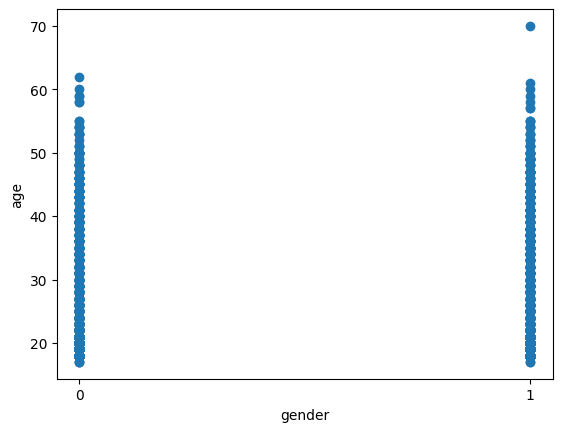

In [11]:

plt.scatter(df['Gender'], df['Age at enrollment'])
plt.xticks(ticks=[0, 1])
plt.xlabel("gender")
plt.ylabel("age")


Text(0, 0.5, 'Admission grade')

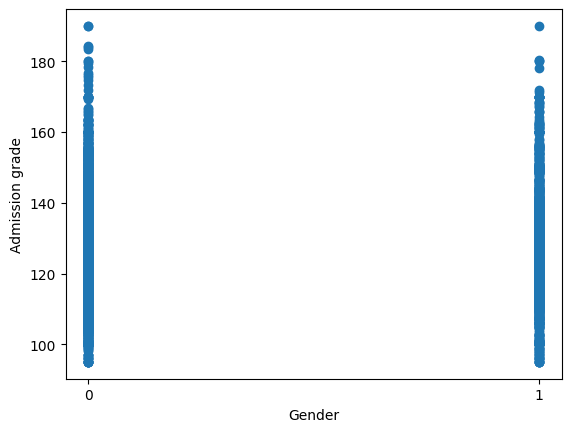

In [14]:

plt.scatter(df['Gender'], df['Admission grade'])
plt.xticks(ticks=[0, 1])
plt.xlabel('Gender')
plt.ylabel("Admission grade")


To my mind it's great to look at some data in different plots, so I made a box plot that shows the correlation between salary in USD and the level of experience.

3. The next question is whether the salary depends on the overall amount of remote work.

Text(0, 0.5, 'GDP')

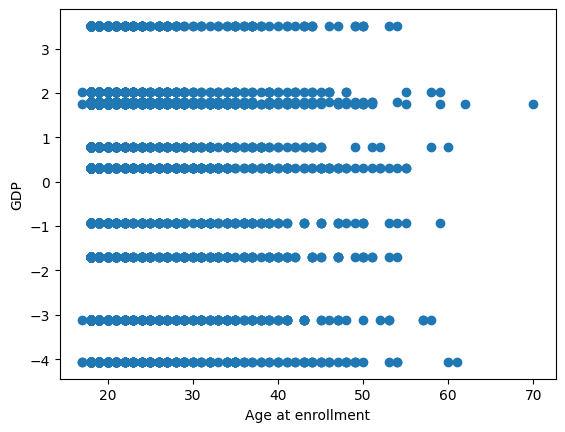

In [15]:

plt.scatter(df['Age at enrollment'], df['GDP'])
plt.xlabel('Age at enrollment')
plt.ylabel('GDP')


(<Figure size 2000x2000 with 3 Axes>,
 {('1', 'Dropout'): (0.0, 0.0, 0.34996806204061065, 0.4475306014743185),
  ('1', 'Graduate'): (0.0,
   0.4508418597524642,
   0.34996806204061065,
   0.3498527383850593),
  ('1', 'Enrolled'): (0.0,
   0.8040058564156692,
   0.34996806204061065,
   0.19599414358433062),
  ('0', 'Dropout'): (0.3549431864187201,
   0.0,
   0.6450568135812799,
   0.2493834686469561),
  ('0', 'Graduate'): (0.3549431864187201,
   0.2526947269251018,
   0.6450568135812799,
   0.5753138075313806),
  ('0', 'Enrolled'): (0.3549431864187201,
   0.8313197927346282,
   0.6450568135812799,
   0.16868020726537172)})

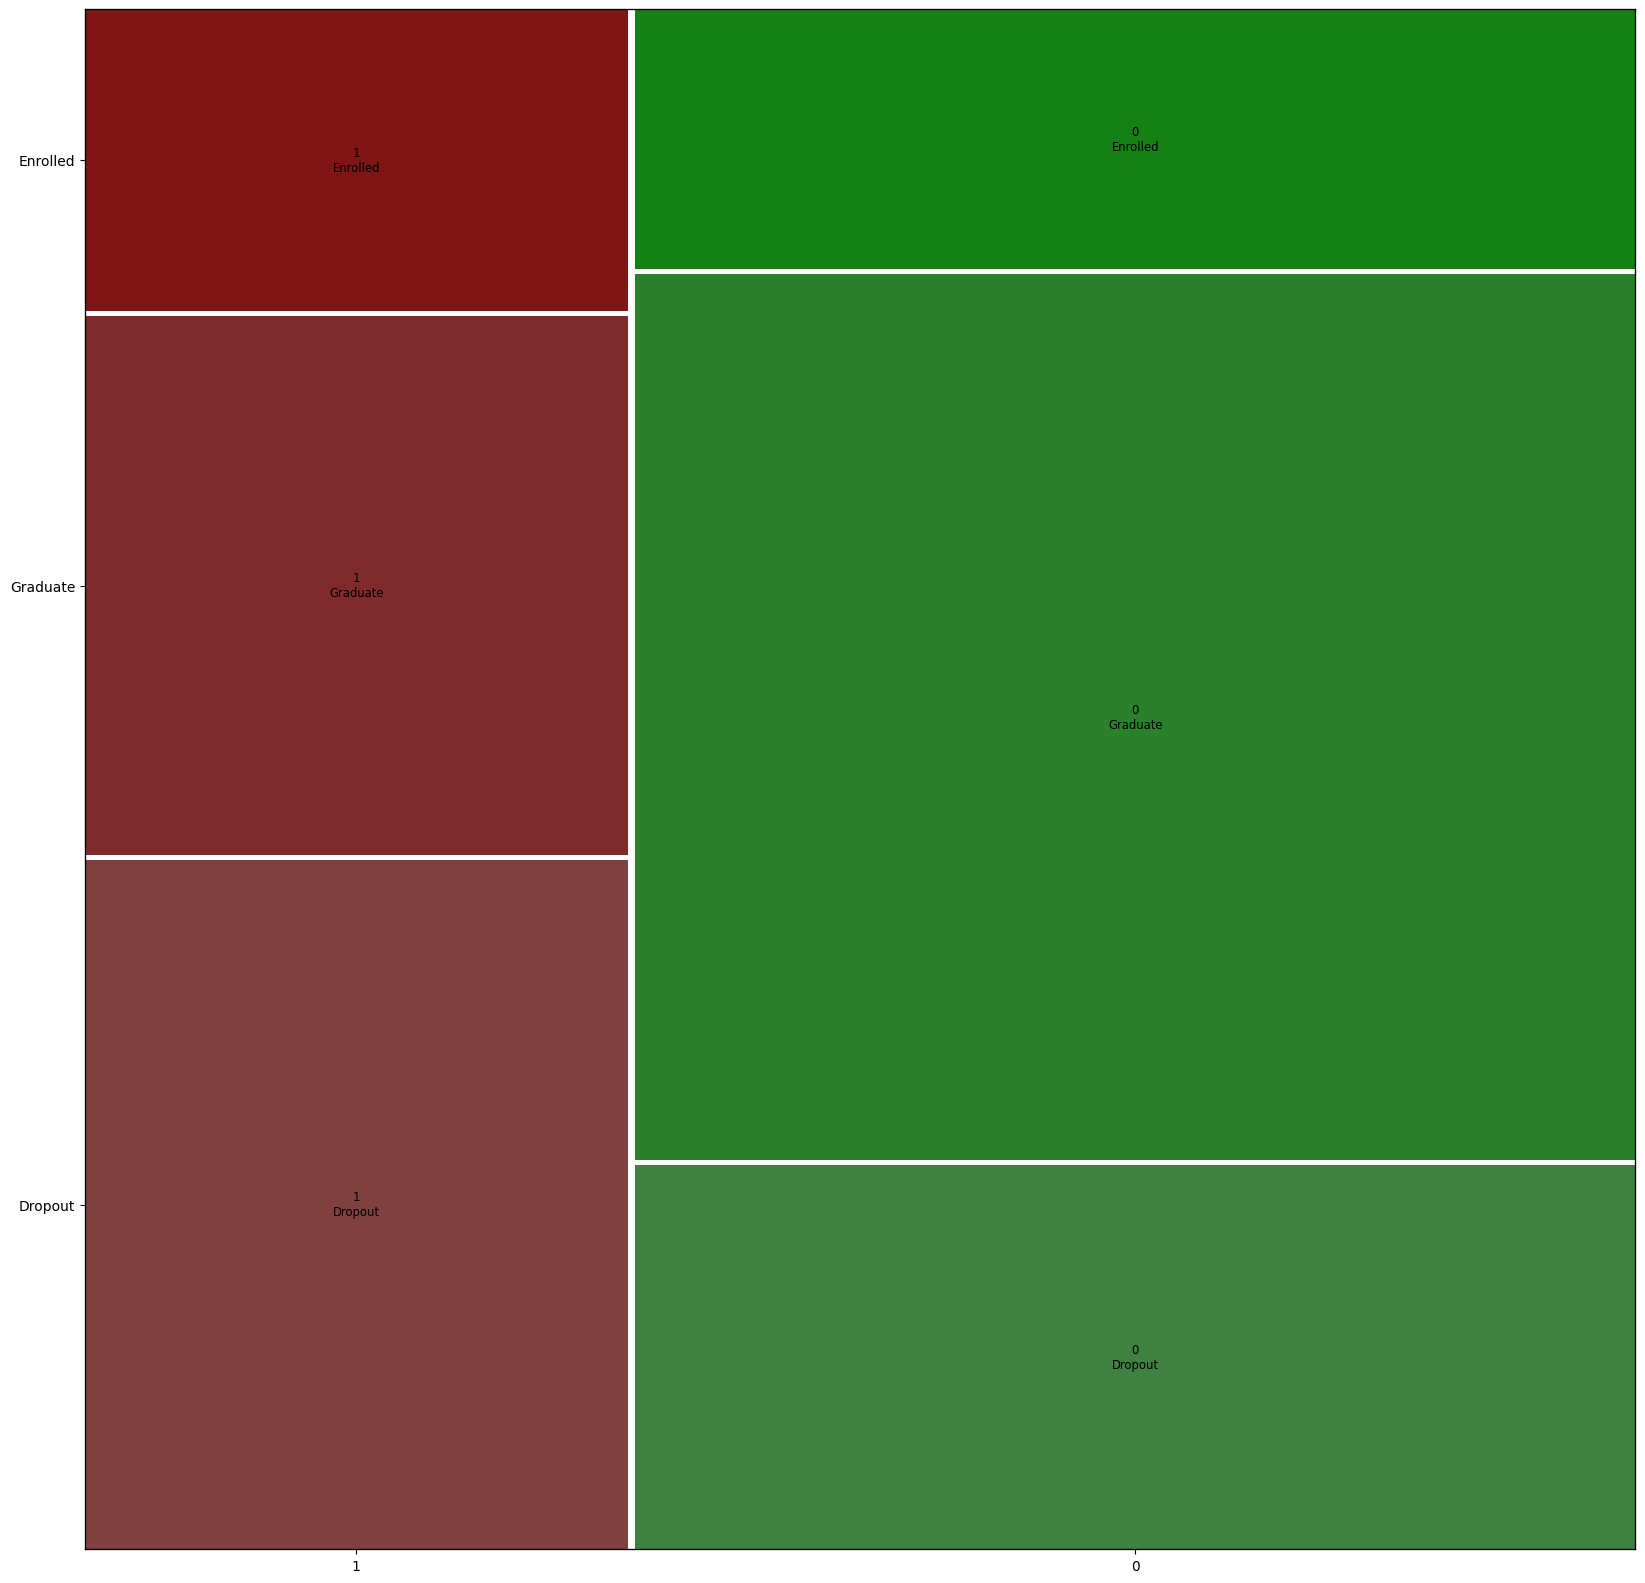

In [23]:
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
plt.rcParams["figure.figsize"]=(20, 20)
mosaic(df, ['Gender','Target'])

Using mosaic plot I found out that the largest group is senior-level experience with a remote work ratio of 0.

In [16]:
fig=px.pie(df, values=df['Gender'].value_counts().values,
           names=df['Gender'].value_counts().index, title='Gender')
fig.show()

In [18]:
fig=px.pie(df, values=df['Target'].value_counts().values,
           names=df['Target'].value_counts().index, title='Target')
fig.show()

In [21]:
fig=px.pie(df, values=df['International'].value_counts().values,
           names=df['International'].value_counts().index, title='Nacionality')
fig.show()

Text(0, 0.5, 'Target')

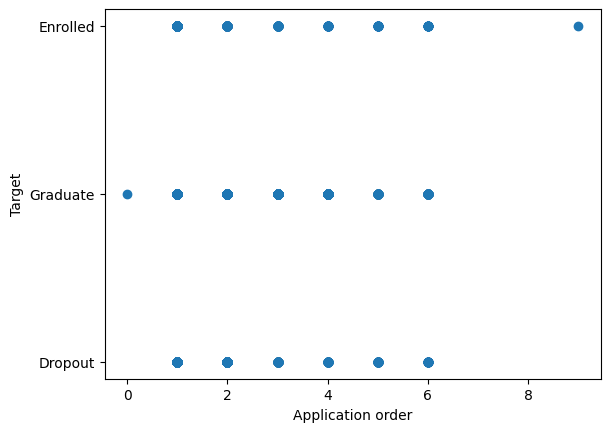

In [22]:

plt.scatter(df['Application order'], df['Target'])
plt.xlabel("Application order")
plt.ylabel("Target")

## Data Average

It is now intriguing to determine the top five jobs with the highest average salaries.

In [27]:
avg_target_per_course = df.groupby(by='GPD')['Course'].mean().reset_index(name='avg')
avg_target_per_course.nlargest(5, 'avg')

KeyError: 'GPD'

The results showed that the top 5 jobs with the highest average salaries are: 
- Data Science Tech Lead	
- Cloud Data Architect	
- Data Lead	
- Data Analytics Lead	
- Principal Data Scientist	

## World Map Statistics

/tmp/ipykernel_4897/211887969.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,country,avg
40,ISR,271446.500000
59,PRI,167500.000000
70,USA,151822.009539
62,RUS,140333.333333
13,CAN,131917.689655


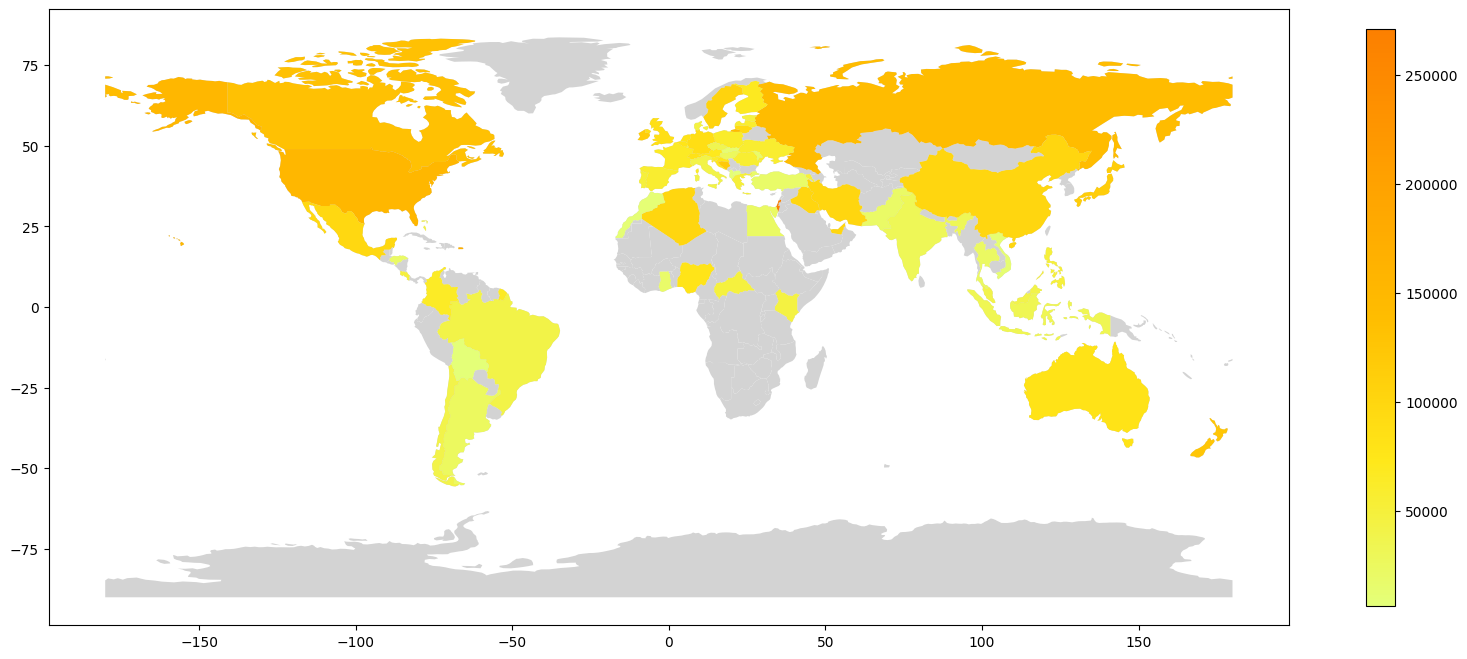

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['iso_a3', 'geometry']]
world.rename(columns={'iso_a3': 'country'}, inplace=True)

def convert_a2_to_a3(row):
    iso_a2 = row['company_location']
    country = pycountry.countries.get(alpha_2=iso_a2)
    return country.alpha_3

df['country'] = df.apply(convert_a2_to_a3, axis=1)
avg_per_country = df.groupby(by='country')['salary_in_usd'].mean().reset_index(name='avg')
merged = pd.merge(world, avg_per_country, on='country')
fig, ax = plt.subplots(figsize=(20,15))
world.plot(figsize=(20,15), color='lightgray', ax=ax)
merged.plot(column="avg", legend=True, legend_kwds={'shrink': 0.5}, cmap='Wistia', figsize=(20,15), ax=ax)


avg_per_country.nlargest(5, 'avg')

There is a world map that shows the statistics of average salary in USD per country.

The highest salaries are in Russia, USA, Canada, Israel, and Puerto Rico

Loooking at the result we see that the most group is senior-level experience with 0 remote ratio

## Filtering the information

Understanding that we have not only the company location but also the employee residence, I was curious to examine the data about non-U.S. citizens in U.S. companies.

In [16]:

filtered = df.loc[(df['employee_residence'] != 'US') & (df['company_location'] == 'US')]
filtered.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,41.000000,4.100000e+01,41.000000,41.000000
mean,2021.536585,5.091064e+05,75843.560976,87.804878
std,0.868837,1.824462e+06,54819.501270,26.880494
min,2020.000000,1.200000e+04,5679.000000,0.000000
25%,2021.000000,4.800000e+04,36259.000000,100.000000
50%,2022.000000,7.500000e+04,56000.000000,100.000000
75%,2022.000000,1.500000e+05,100000.000000,100.000000
max,2023.000000,1.100000e+07,200000.000000,100.000000


As a result, I discovered that there are 41 people in this category. More than 25% of the people in this category work remotely, and the minimum salary in this group is $5,679.